# Tutorial on Altair Visualization

Feb. 27, 2019 (Strongway)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/altair_visualization.ipynb)

In this tutorial, we will go through basic components of Altair. Some tutorial materials are directly from the official [Altair website](https://altair-viz.github.io). 

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.

Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly. Here is an example of using the Altair API to quickly visualize a dataset with an interactive scatter plot:


In [ ]:
# show sys info or install package, use commandline
#!df -h
#!cat /proc/cpuinfo
#!cat /proc/meminfo

In [ ]:
# Some prep work to get the data from R and into pandas
%matplotlib inline

# pandas for data process, seaborn for plotting, in addition, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option("display.max_rows", 5)

In [3]:
import altair as alt
from vega_datasets import data
import pandas as pd


iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive()

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  ..           ...         ...          ...         ...        ...
  148          5.4         2.3          6.2         3.4  virginica
  149          5.1         1.8          5.9         3.0  virginica
  
  [150 rows x 5 columns],
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'species'
    }),
    x: X({
      shorthand: 'petalLength'
    }),
    y: Y({
      shorthand: 'petalWidth'
    })
  }),
  mark: 'point',
  selection: SelectionMapping({
    selector001: SelectionDef({
      bind: 'scales',
      encodings: ['x', 'y'],
      type: 'interval'
    })
  })
})

## The Chart Object

The fundamental object in Altair is the Chart, which takes a dataframe as a single argument. 
Each top-level chart object (i.e. `Chart`, `LayerChart`,
and `VConcatChart`, `HConcatChart`, `RepeatChart`,
`FacetChart`) accepts a dataset as its first argument.
The dataset can be specified in one of three ways:

- as a `Pandas DataFrame <http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html>`_
- as a `Data` or related object (i.e. `UrlData`, `InlineData`, `NamedData`)
- as a url string pointing to a ``json`` or ``csv`` formatted text file



In [ ]:

chart = alt.Chart(iris)


So far, we have defined the Chart object, but we have not yet told the chart to do anything with the data. 

## Encodings and Marks

With this chart object in hand, we can now specify how we would like the
data to be visualized. This is done via the ``mark`` attribute of the chart
object, which is most conveniently accessed via the ``Chart.mark_*`` methods.
For example, we can show the data as a point using `Chart.mark_point`:

In [ ]:
alt.Chart(iris).mark_point()

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3         3.0     setosa
  14           1.2         0.2          5.8         4.0     setosa
  15           1.5         0.4          5.7         4.4     setosa
  16           1.3         0.4          5.4         3.9     setosa
  17           1.4         0.3          5.1         3.5     setosa
  18           1.7         0.3          5.7         3.8     setosa
  19           1.5         0.3          5.1         3.8     setosa
  20           1.7         0.2          5.4         3.4     setosa
  21           1.5         0.4          5.1         3.7     setosa
  22           1.0         0.2          4.6         3.6     setosa
  23           1.7         0.5          5.1         3.3     setosa
  24           1.9         0.2          4.8         3.4     setosa
  25           1.6         0.2          5.0         3.0     setosa
  26           1.6         0.4          5.0         3.4     setosa
  27           1.5         0.2          5.2         3.5     setosa
  28           1.4         0.2          5.2         3.4     setosa
  29           1.6         0.2          4.7         3.2     setosa
  ..           ...         ...          ...         ...        ...
  120          5.7         2.3          6.9         3.2  virginica
  121          4.9         2.0          5.6         2.8  virginica
  122          6.7         2.0          7.7         2.8  virginica
  123          4.9         1.8          6.3         2.7  virginica
  124          5.7         2.1          6.7         3.3  virginica
  125          6.0         1.8          7.2         3.2  virginica
  126          4.8         1.8          6.2         2.8  virginica
  127          4.9         1.8          6.1         3.0  virginica
  128          5.6         2.1          6.4         2.8  virginica
  129          5.8         1.6          7.2         3.0  virginica
  130          6.1         1.9          7.4         2.8  virginica
  131          6.4         2.0          7.9         3.8  virginica
  132          5.6         2.2          6.4         2.8  virginica
  133          5.1         1.5          6.3         2.8  virginica
  134          5.6         1.4          6.1         2.6  virginica
  135          6.1         2.3          7.7         3.0  virginica
  136          5.6         2.4          6.3         3.4  virginica
  137          5.5         1.8          6.4         3.1  virginica
  138          4.8         1.8          6.0         3.0  virginica
  139          5.4         2.1          6.9         3.1  virginica
  140          5.6         2.4          6.7         3.1  virginica
  141          5.1         2.3          6.9         3.1  virginica
  142          5.1         1.9          5.8         2.7  virginica
  143          5.9         2.3          6.8         3.2  virginica
  144          5.7         2.5          6.7         3.3  virginica
  145          5.2         2.3          6.7         3.0  virginica
  146          5.0         1.9          6.3         2.5  virginica
  147          5.2         2.0   

Altair provides a number of mark properties:


1.   area: `mark_area()`
2.   bar: `mark_bar()`
3. line: `mark_line()`
4. point: `mark_point()`, `mark_circle()`, `mark_square()`
5. text: `mark_text()`

`mark_*()` accept a number of parameters. Please see [user guide here for details](https://altair-viz.github.io/user_guide/marks.html).

### Encodings

Above it draws only one point, because we haven't assign what for `x` and what for `y` etc. This is done by `encode()` method, which builds a key-value mapping between encoding channels (such as `x`,`y`,`color`,`shape`,`size`, etc.) to columns in the dataset, accessed by colmun name. See above example. 

Altair provides a number of encoding channels that can be useful in different circumstances:

__Position Channels__:

* x  - The x-axis value
* y - The y-axis value
* x2 - Second x value for ranges (e.g., error bars)
* y2 - second y value for ranges (e.g., error bars for y)

__Mark Property Channels__:

* color - the color of the mark
* fill - the fill color for the mark
* opacity - the opacity of the mark
* shape - the shape of the mark
* size - the size of the mark
* stroke - the stroke of the mark

__Text and other channels__

* text - text to use for the mark
* tooktip - the tooltip value
* detail - additional property to group by

__Facet Channels__

* column - The column of a faceted plot
* row - the row of a faceted plot

### Encoding data type

By default Altair will look the data type and use them correspondently. Alternative, you can specify them explicitly. There are __four__ main types:

Data Type  |    Shorthand Code | Description
--- | ---- | ----
quantitative |  ``Q``   |        a continuous real-valued quantity
ordinal      | ``O``    |       a discrete ordered quantity
nominal     |  ``N``  |         a discrete unordered category
temporal    |  ``T``  |         a time or date value

The types can either be expressed in a long-form using the channel encoding classes such as X and Y, or in short-form using the Shorthand Syntax.

THe shorthand form (e.g., `x = "name:Q"`) is useful when doing quick data explorations. The long-form, `alt.X('name', type = 'quantitative')` is useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.  


In [ ]:
alt.Chart(pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})).mark_bar().encode(
    y='a:N',
    x='average(b):Q'
)

Chart({
  data:    a  b
  0  C  2
  1  C  7
  2  C  4
  3  D  1
  4  D  2
  5  D  6
  6  E  8
  7  E  4
  8  E  7,
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'average(b):Q'
    }),
    y: Y({
      shorthand: 'a:N'
    })
  }),
  mark: 'bar'
})

We use the above `iris` dataset to see how the encoding data type influence the plots. 

In [ ]:
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [ ]:
base = alt.Chart(iris).mark_point().encode(
    x = 'sepalLength:Q',
    y = 'sepalWidth:Q'
).properties(
    width = 150,
    height = 150
)

alt.hconcat(
    base.encode(color = 'species:N').properties(title = 'Ordinal'),
    base.encode(color = 'petalWidth:Q').properties(title = 'Quantitative'),
)

HConcatChart({
  hconcat: [Chart({
    data:      petalLength  petalWidth  sepalLength  sepalWidth    species
    0            1.4         0.2          5.1         3.5     setosa
    1            1.4         0.2          4.9         3.0     setosa
    2            1.3         0.2          4.7         3.2     setosa
    3            1.5         0.2          4.6         3.1     setosa
    4            1.4         0.2          5.0         3.6     setosa
    5            1.7         0.4          5.4         3.9     setosa
    6            1.4         0.3          4.6         3.4     setosa
    7            1.5         0.2          5.0         3.4     setosa
    8            1.4         0.2          4.4         2.9     setosa
    9            1.5         0.1          4.9         3.1     setosa
    10           1.5         0.2          5.4         3.7     setosa
    11           1.6         0.2          4.8         3.4     setosa
    12           1.4         0.1          4.8         3.0     setosa
    13           1.1         0.1          4.3         3.0     setosa
    14           1.2         0.2          5.8         4.0     setosa
    15           1.5         0.4          5.7         4.4     setosa
    16           1.3         0.4          5.4         3.9     setosa
    17           1.4         0.3          5.1         3.5     setosa
    18           1.7         0.3          5.7         3.8     setosa
    19           1.5         0.3          5.1         3.8     setosa
    20           1.7         0.2          5.4         3.4     setosa
    21           1.5         0.4          5.1         3.7     setosa
    22           1.0         0.2          4.6         3.6     setosa
    23           1.7         0.5          5.1         3.3     setosa
    24           1.9         0.2          4.8         3.4     setosa
    25           1.6         0.2          5.0         3.0     setosa
    26           1.6         0.4          5.0         3.4     setosa
    27           1.5         0.2          5.2         3.5     setosa
    28           1.4         0.2          5.2         3.4     setosa
    29           1.6         0.2          4.7         3.2     setosa
    ..           ...         ...          ...         ...        ...
    120          5.7         2.3          6.9         3.2  virginica
    121          4.9         2.0          5.6         2.8  virginica
    122          6.7         2.0          7.7         2.8  virginica
    123          4.9         1.8          6.3         2.7  virginica
    124          5.7         2.1          6.7         3.3  virginica
    125          6.0         1.8          7.2         3.2  virginica
    126          4.8         1.8          6.2         2.8  virginica
    127          4.9         1.8          6.1         3.0  virginica
    128          5.6         2.1          6.4         2.8  virginica
    129          5.8         1.6          7.2         3.0  virginica
    130          6.1         1.9          7.4         2.8  virginica
    131          6.4         2.0          7.9         3.8  virginica
    132          5.6         2.2          6.4         2.8  virginica
    133          5.1         1.5          6.3         2.8  virginica
    134          5.6         1.4          6.1         2.6  virginica
    135          6.1         2.3          7.7         3.0  virginica
    136          5.6         2.4          6.3         3.4  virginica
    137          5.5         1.8          6.4         3.1  virginica
    138          4.8         1.8          6.0         3.0  virginica
    139          5.4         2.1          6.9         3.1  virginica
    140          5.6         2.4          6.7         3.1  virginica
    141          5.1         2.3          6.9         3.1  virginica
    142          5.1         1.9          5.8         2.7  virginica
    143          5.9         2.3          6.8         3.2  virginica
    144          5.7         2.5          6.7         3.3  virginica
    145          5.2      

### Your task

After inspection of the `iris` table, please make a scatter plot to see the the relation between `sepalLength` and `sepalWidth`, separated for different species with __color__ and __shape__. 

In [ ]:
# Type in your code here


### Answer

In [ ]:
alt.Chart(iris).mark_point().encode(
    x = 'sepalLength',
    y = 'sepalWidth',
    color = 'species',
    shape = 'species'
)

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3         3.0     setosa
  14           1.2         0.2          5.8         4.0     setosa
  15           1.5         0.4          5.7         4.4     setosa
  16           1.3         0.4          5.4         3.9     setosa
  17           1.4         0.3          5.1         3.5     setosa
  18           1.7         0.3          5.7         3.8     setosa
  19           1.5         0.3          5.1         3.8     setosa
  20           1.7         0.2          5.4         3.4     setosa
  21           1.5         0.4          5.1         3.7     setosa
  22           1.0         0.2          4.6         3.6     setosa
  23           1.7         0.5          5.1         3.3     setosa
  24           1.9         0.2          4.8         3.4     setosa
  25           1.6         0.2          5.0         3.0     setosa
  26           1.6         0.4          5.0         3.4     setosa
  27           1.5         0.2          5.2         3.5     setosa
  28           1.4         0.2          5.2         3.4     setosa
  29           1.6         0.2          4.7         3.2     setosa
  ..           ...         ...          ...         ...        ...
  120          5.7         2.3          6.9         3.2  virginica
  121          4.9         2.0          5.6         2.8  virginica
  122          6.7         2.0          7.7         2.8  virginica
  123          4.9         1.8          6.3         2.7  virginica
  124          5.7         2.1          6.7         3.3  virginica
  125          6.0         1.8          7.2         3.2  virginica
  126          4.8         1.8          6.2         2.8  virginica
  127          4.9         1.8          6.1         3.0  virginica
  128          5.6         2.1          6.4         2.8  virginica
  129          5.8         1.6          7.2         3.0  virginica
  130          6.1         1.9          7.4         2.8  virginica
  131          6.4         2.0          7.9         3.8  virginica
  132          5.6         2.2          6.4         2.8  virginica
  133          5.1         1.5          6.3         2.8  virginica
  134          5.6         1.4          6.1         2.6  virginica
  135          6.1         2.3          7.7         3.0  virginica
  136          5.6         2.4          6.3         3.4  virginica
  137          5.5         1.8          6.4         3.1  virginica
  138          4.8         1.8          6.0         3.0  virginica
  139          5.4         2.1          6.9         3.1  virginica
  140          5.6         2.4          6.7         3.1  virginica
  141          5.1         2.3          6.9         3.1  virginica
  142          5.1         1.9          5.8         2.7  virginica
  143          5.9         2.3          6.8         3.2  virginica
  144          5.7         2.5          6.7         3.3  virginica
  145          5.2         2.3          6.7         3.0  virginica
  146          5.0         1.9          6.3         2.5  virginica
  147          5.2         2.0   

### Encoding channel options

Each encoding channel allows for a number of additional options to be expressed; these can control things like axis properties, scale properties, headers and titles, binning parameters, aggregation, sorting, and many more.

The particular options that are available vary by encoding type; the various options. For examples:

1. aggregate: `mean`, `sum`,`median`, `min`, `max`, `count`
2. axis: an object defining properties of axis's gridlines, ticks, and labels
3. bin: a flag for binning a quantitative field. 
4. field: a string defining the name of the field from which to pull a data value or an object defining iterated values from the repeat operator. 

For a complete guide, please check the original document [here](https://altair-viz.github.io/user_guide/encoding.html). 

For those additional options, you need to use the long-format (e.g., `alt.X()`), which accept more than one parameters. Here is an example:


In [ ]:
alt.Chart(iris).mark_bar().encode(alt.X('sepalLength', bin = True), y = 'count()')

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3         3.0     setosa
  14           1.2         0.2          5.8         4.0     setosa
  15           1.5         0.4          5.7         4.4     setosa
  16           1.3         0.4          5.4         3.9     setosa
  17           1.4         0.3          5.1         3.5     setosa
  18           1.7         0.3          5.7         3.8     setosa
  19           1.5         0.3          5.1         3.8     setosa
  20           1.7         0.2          5.4         3.4     setosa
  21           1.5         0.4          5.1         3.7     setosa
  22           1.0         0.2          4.6         3.6     setosa
  23           1.7         0.5          5.1         3.3     setosa
  24           1.9         0.2          4.8         3.4     setosa
  25           1.6         0.2          5.0         3.0     setosa
  26           1.6         0.4          5.0         3.4     setosa
  27           1.5         0.2          5.2         3.5     setosa
  28           1.4         0.2          5.2         3.4     setosa
  29           1.6         0.2          4.7         3.2     setosa
  ..           ...         ...          ...         ...        ...
  120          5.7         2.3          6.9         3.2  virginica
  121          4.9         2.0          5.6         2.8  virginica
  122          6.7         2.0          7.7         2.8  virginica
  123          4.9         1.8          6.3         2.7  virginica
  124          5.7         2.1          6.7         3.3  virginica
  125          6.0         1.8          7.2         3.2  virginica
  126          4.8         1.8          6.2         2.8  virginica
  127          4.9         1.8          6.1         3.0  virginica
  128          5.6         2.1          6.4         2.8  virginica
  129          5.8         1.6          7.2         3.0  virginica
  130          6.1         1.9          7.4         2.8  virginica
  131          6.4         2.0          7.9         3.8  virginica
  132          5.6         2.2          6.4         2.8  virginica
  133          5.1         1.5          6.3         2.8  virginica
  134          5.6         1.4          6.1         2.6  virginica
  135          6.1         2.3          7.7         3.0  virginica
  136          5.6         2.4          6.3         3.4  virginica
  137          5.5         1.8          6.4         3.1  virginica
  138          4.8         1.8          6.0         3.0  virginica
  139          5.4         2.1          6.9         3.1  virginica
  140          5.6         2.4          6.7         3.1  virginica
  141          5.1         2.3          6.9         3.1  virginica
  142          5.1         1.9          5.8         2.7  virginica
  143          5.9         2.3          6.8         3.2  virginica
  144          5.7         2.5          6.7         3.3  virginica
  145          5.2         2.3          6.7         3.0  virginica
  146          5.0         1.9          6.3         2.5  virginica
  147          5.2         2.0   

In [ ]:
# another example
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_area().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="ascending")
).properties(width = 400, height = 300)

Chart({
  data:                 site           variety  year     yield
  0    University Farm         Manchuria  1931  27.00000
  1             Waseca         Manchuria  1931  48.86667
  2             Morris         Manchuria  1931  27.43334
  3          Crookston         Manchuria  1931  39.93333
  4       Grand Rapids         Manchuria  1931  32.96667
  5             Duluth         Manchuria  1931  28.96667
  6    University Farm           Glabron  1931  43.06666
  7             Waseca           Glabron  1931  55.20000
  8             Morris           Glabron  1931  28.76667
  9          Crookston           Glabron  1931  38.13333
  10      Grand Rapids           Glabron  1931  29.13333
  11            Duluth           Glabron  1931  29.66667
  12   University Farm          Svansota  1931  35.13333
  13            Waseca          Svansota  1931  47.33333
  14            Morris          Svansota  1931  25.76667
  15         Crookston          Svansota  1931  40.46667
  16      Grand Rapids          Svansota  1931  29.66667
  17            Duluth          Svansota  1931  25.70000
  18   University Farm            Velvet  1931  39.90000
  19            Waseca            Velvet  1931  50.23333
  20            Morris            Velvet  1931  26.13333
  21         Crookston            Velvet  1931  41.33333
  22      Grand Rapids            Velvet  1931  23.03333
  23            Duluth            Velvet  1931  26.30000
  24   University Farm             Trebi  1931  36.56666
  25            Waseca             Trebi  1931  63.83330
  26            Morris             Trebi  1931  43.76667
  27         Crookston             Trebi  1931  46.93333
  28      Grand Rapids             Trebi  1931  29.76667
  29            Duluth             Trebi  1931  33.93333
  ..               ...               ...   ...       ...
  90   University Farm           No. 457  1932  26.43334
  91            Waseca           No. 457  1932  42.20000
  92            Morris           No. 457  1932  43.53334
  93         Crookston           No. 457  1932  34.33333
  94      Grand Rapids           No. 457  1932  19.46667
  95            Duluth           No. 457  1932  22.70000
  96   University Farm           No. 462  1932  25.56667
  97            Waseca           No. 462  1932  44.70000
  98            Morris           No. 462  1932  47.00000
  99         Crookston           No. 462  1932  30.53333
  100     Grand Rapids           No. 462  1932  19.90000
  101           Duluth           No. 462  1932  22.50000
  102  University Farm          Peatland  1932  28.06667
  103           Waseca          Peatland  1932  36.03333
  104           Morris          Peatland  1932  43.20000
  105        Crookston          Peatland  1932  25.23333
  106     Grand Rapids          Peatland  1932  26.76667
  107           Duluth          Peatland  1932  31.36667
  108  University Farm           No. 475  1932  30.00000
  109           Waseca           No. 475  1932  41.26667
  110           Morris           No. 475  1932  44.23333
  111        Crookston           No. 475  1932  32.13333
  112     Grand Rapids           No. 475  1932  15.23333
  113           Duluth           No. 475  1932  27.36667
  114  University Farm  Wisconsin No. 38  1932  38.00000
  115           Waseca  Wisconsin No. 38  1932  58.16667
  116           Morris  Wisconsin No. 38  1932  47.16667
  117        Crookston  Wisconsin No. 38  1932  35.90000
  118     Grand Rapids  Wisconsin No. 38  1932  20.66667
  119           Duluth  Wisconsin No. 38  1932  29.33333
  
  [120 rows x 4 columns],
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'site:N'
    }),
    order: Order({
      shorthand: 'site',
      sort: 'ascending'
    }),
    x: X({
      shorthand: 'variety:N'
    }),
    y: Y({
      shorthand: 'sum(yield):Q'
    })
  }),
  height: 300,
  mark: 'area',
  width: 400
})

Did you notice that in our previous plot of `iris` dataset, the scatter dots are in the right upper corner. This is because by default the scale of the plot starts from '(0,0)'. We can inhibit this using the additional option `scale`. Most used two options are:

* alt.Scale(zero = False)
* alt.Scale(domain = (lower, upper))

In [ ]:
alt.Chart(iris).mark_point().encode(
    alt.X('sepalLength', scale = alt.Scale(zero = False)),
    alt.Y('sepalWidth',scale = alt.Scale(domain = (1,5))),
    color = 'species',
    shape = 'species'
)

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3         3.0     setosa
  14           1.2         0.2          5.8         4.0     setosa
  15           1.5         0.4          5.7         4.4     setosa
  16           1.3         0.4          5.4         3.9     setosa
  17           1.4         0.3          5.1         3.5     setosa
  18           1.7         0.3          5.7         3.8     setosa
  19           1.5         0.3          5.1         3.8     setosa
  20           1.7         0.2          5.4         3.4     setosa
  21           1.5         0.4          5.1         3.7     setosa
  22           1.0         0.2          4.6         3.6     setosa
  23           1.7         0.5          5.1         3.3     setosa
  24           1.9         0.2          4.8         3.4     setosa
  25           1.6         0.2          5.0         3.0     setosa
  26           1.6         0.4          5.0         3.4     setosa
  27           1.5         0.2          5.2         3.5     setosa
  28           1.4         0.2          5.2         3.4     setosa
  29           1.6         0.2          4.7         3.2     setosa
  ..           ...         ...          ...         ...        ...
  120          5.7         2.3          6.9         3.2  virginica
  121          4.9         2.0          5.6         2.8  virginica
  122          6.7         2.0          7.7         2.8  virginica
  123          4.9         1.8          6.3         2.7  virginica
  124          5.7         2.1          6.7         3.3  virginica
  125          6.0         1.8          7.2         3.2  virginica
  126          4.8         1.8          6.2         2.8  virginica
  127          4.9         1.8          6.1         3.0  virginica
  128          5.6         2.1          6.4         2.8  virginica
  129          5.8         1.6          7.2         3.0  virginica
  130          6.1         1.9          7.4         2.8  virginica
  131          6.4         2.0          7.9         3.8  virginica
  132          5.6         2.2          6.4         2.8  virginica
  133          5.1         1.5          6.3         2.8  virginica
  134          5.6         1.4          6.1         2.6  virginica
  135          6.1         2.3          7.7         3.0  virginica
  136          5.6         2.4          6.3         3.4  virginica
  137          5.5         1.8          6.4         3.1  virginica
  138          4.8         1.8          6.0         3.0  virginica
  139          5.4         2.1          6.9         3.1  virginica
  140          5.6         2.4          6.7         3.1  virginica
  141          5.1         2.3          6.9         3.1  virginica
  142          5.1         1.9          5.8         2.7  virginica
  143          5.9         2.3          6.8         3.2  virginica
  144          5.7         2.5          6.7         3.3  virginica
  145          5.2         2.3          6.7         3.0  virginica
  146          5.0         1.9          6.3         2.5  virginica
  147          5.2         2.0   

In [ ]:
from vega_datasets import data
pop = data.population()
pop.head()

,age,people,sex,year
0,0,1483789,1,1850
1,0,1450376,2,1850
2,5,1411067,1,1850
3,5,1359668,2,1850
4,10,1260099,1,1850


In [ ]:
alt.Chart(pop).mark_line().encode(
    x='age:O',
    y='sum(people):Q',
    color='year:O'
).transform_filter(
    alt.FieldRangePredicate(field='year', range=[1930, 2000])
)

Chart({
  data:      age    people  sex  year
  0      0   1483789    1  1850
  1      0   1450376    2  1850
  2      5   1411067    1  1850
  3      5   1359668    2  1850
  4     10   1260099    1  1850
  5     10   1216114    2  1850
  6     15   1077133    1  1850
  7     15   1110619    2  1850
  8     20   1017281    1  1850
  9     20   1003841    2  1850
  10    25    862547    1  1850
  11    25    799482    2  1850
  12    30    730638    1  1850
  13    30    639636    2  1850
  14    35    588487    1  1850
  15    35    505012    2  1850
  16    40    475911    1  1850
  17    40    428185    2  1850
  18    45    384211    1  1850
  19    45    341254    2  1850
  20    50    321343    1  1850
  21    50    286580    2  1850
  22    55    194080    1  1850
  23    55    187208    2  1850
  24    60    174976    1  1850
  25    60    162236    2  1850
  26    65    106827    1  1850
  27    65    105534    2  1850
  28    70     73677    1  1850
  29    70     71762    2  1850
  ..   ...       ...  ...   ...
  540   20   9731315    1  2000
  541   20   9324244    2  2000
  542   25   9659493    1  2000
  543   25   9518507    2  2000
  544   30  10205879    1  2000
  545   30  10119296    2  2000
  546   35  11475182    1  2000
  547   35  11635647    2  2000
  548   40  11320252    1  2000
  549   40  11488578    2  2000
  550   45   9925006    1  2000
  551   45  10261253    2  2000
  552   50   8507934    1  2000
  553   50   8911133    2  2000
  554   55   6459082    1  2000
  555   55   6921268    2  2000
  556   60   5123399    1  2000
  557   60   5668961    2  2000
  558   65   4453623    1  2000
  559   65   4804784    2  2000
  560   70   3792145    1  2000
  561   70   5184855    2  2000
  562   75   2912655    1  2000
  563   75   4355644    2  2000
  564   80   1902638    1  2000
  565   80   3221898    2  2000
  566   85    970357    1  2000
  567   85   1981156    2  2000
  568   90    336303    1  2000
  569   90   1064581    2  2000
  
  [570 rows x 4 columns],
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'year:O'
    }),
    x: X({
      shorthand: 'age:O'
    }),
    y: Y({
      shorthand: 'sum(people):Q'
    })
  }),
  mark: 'line',
  transform: [FilterTransform({
    filter: FieldRangePredicate({
      field: 'year',
      range: [1930, 2000]
    })
  })]
})

### Practice

#### 1. Replot previous figure using `query()`

Similarly, you can use pandas.query() to filter the data beforehand. Recall our previous session tutorial, and do the same plot, but using `query()` function. 


In [ ]:
# please in put your code here. 

#### Answer

In [ ]:
alt.Chart(pop.query('year >=1930 & year <=2000')).mark_line().encode(
    x='age:O',
    y='sum(people):Q',
    color='year:O'
)

#### 2. Plot mean data

Recall in our previous session _Python for R User_, we learned to how to import data from internet and do tidyverse way. Here we first import one dataset from our recent study (Chen et al., 2018).

This dataset contained behavioral data from a visual duration judgment task, using Ternus apparent motion. Most important columns are: `mIntv` (auditory mean interval, manipulation on irrelevant modality), `soa` (duration), `resp` (0 - short duration, 1 - long duration), `sub` (subject number). 

In [ ]:
url = 'https://raw.githubusercontent.com/msenselab/temporal_averaging/master/exp1.csv'
dat = pd.read_csv(url)
dat.head()

,motion,mIntv,position,soa,lenSeq,mi,resp,rt,lastIntv,sub
0,2,3,3,50,1,23,0,0.261889,20,1
1,2,1,3,200,2,9,1,0.378889,20,1
2,2,1,3,230,0,9,1,0.202555,6,1
3,1,3,3,50,1,23,0,0.231047,20,1
4,2,2,3,170,1,16,1,0.223716,20,1


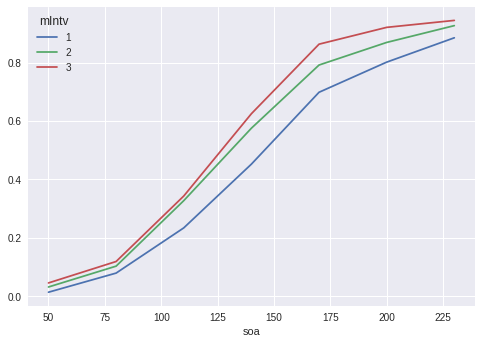

In [ ]:
# We can plot using `pandas` plot function. 
dat.pivot_table('resp','soa','mIntv').plot()

Now your task is to plot the same figure using Altair, using different line colors for different `mIntv` condition. 

In [ ]:
# please type your code here. 

#### Answer

In [ ]:
# using chain rule to calculate the mean data
mdat = dat.groupby(['soa','mIntv']).agg({"resp":"mean"}).reset_index()
print(mdat.head())
# plot using Altair
alt.Chart(mdat).mark_line().encode(
    x = 'soa',
    y = 'resp', 
    color = 'mIntv:N').interactive()


   soa  mIntv      resp
0   50      1  0.013889
1   50      2  0.031746
2   50      3  0.045635
3   80      1  0.079365
4   80      2  0.103175


Chart({
  data:     soa  mIntv      resp
  0    50      1  0.013889
  1    50      2  0.031746
  2    50      3  0.045635
  3    80      1  0.079365
  4    80      2  0.103175
  5    80      3  0.119048
  6   110      1  0.234127
  7   110      2  0.327381
  8   110      3  0.343254
  9   140      1  0.452381
  10  140      2  0.575397
  11  140      3  0.625000
  12  170      1  0.698413
  13  170      2  0.791667
  14  170      3  0.863095
  15  200      1  0.801587
  16  200      2  0.869048
  17  200      3  0.920635
  18  230      1  0.884921
  19  230      2  0.926587
  20  230      3  0.944444,
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'mIntv:N'
    }),
    x: X({
      shorthand: 'soa'
    }),
    y: Y({
      shorthand: 'resp'
    })
  }),
  mark: 'line',
  selection: SelectionMapping({
    selector004: SelectionDef({
      bind: 'scales',
      encodings: ['x', 'y'],
      type: 'interval'
    })
  })
})

Alternatively, you can use Data Transformation from Altair. 

In [ ]:
alt.data_transformers.enable('default', max_rows=100000)  # this is used because by default the maximum row is 5000

alt.Chart(dat).mark_line().encode(
    x = 'soa',
    y = 'mean(resp)',
    color = 'mIntv:N'
)

Chart({
  data:        motion  mIntv  position  soa  lenSeq  mi  resp        rt  lastIntv  sub
  0           2      3         3   50       1  23     0  0.261889        20    1
  1           2      1         3  200       2   9     1  0.378889        20    1
  2           2      1         3  230       0   9     1  0.202555         6    1
  3           1      3         3   50       1  23     0  0.231047        20    1
  4           2      2         3  170       1  16     1  0.223716        20    1
  5           2      1         3  140       2   9     0  0.262567         6    1
  6           2      2         3  140       2  16     1  0.549140         6    1
  7           2      2         3   80       2  16     0  0.239717        20    1
  8           2      1         3  230       1   9     1  0.238573         6    1
  9           2      2         3  170       2  16     1  0.221151         6    1
  10          1      1         3  140       1   9     0  0.476027         6    1
  11          2      3         3  170       0  23     1  0.333801         6    1
  12          1      3         3  170       1  23     1  0.198202         6    1
  13          2      3         3  230       2  23     1  0.221360        20    1
  14          1      3         3  110       1  23     0  0.181850        20    1
  15          1      2         3   80       2  16     0  0.210535        13    1
  16          1      1         3  170       1   9     1  0.289431        13    1
  17          1      3         3  230       1  23     1  0.258686        20    1
  18          1      1         3   80       2   9     0  0.115517         6    1
  19          1      2         3   50       0  16     0  0.212400        13    1
  20          1      1         3  200       2   9     1  0.201212        13    1
  21          2      1         3  110       0   9     0  0.228223        20    1
  22          2      1         3  110       1   9     0  0.211106         6    1
  23          2      3         3  110       0  23     0  0.191746         6    1
  24          1      1         3   80       0   9     0  0.242729        13    1
  25          2      2         3  170       1  16     1  0.185412        20    1
  26          2      3         3  140       2  23     0  0.267848        13    1
  27          1      1         3   50       0   9     0  0.192748        20    1
  28          2      3         3  140       1  23     0  0.399744        20    1
  29          2      1         3  200       2   9     0  0.196513         6    1
  ...       ...    ...       ...  ...     ...  ..   ...       ...       ...  ...
  10554       2      1         3  140       2   8     1  0.820131         6   21
  10555       2      1         3   50       1   8     0  0.249858        20   21
  10556       2      3         3   50       1  22     0  0.310414         6   21
  10557       1      3         3   50       1  22     0  0.270865        20   21
  10558       2      3         3  110       1  22     1  0.691366         6   21
  10559       1      3         3  170       2  22     1  0.241556        13   21
  10560       1      3         3  170       1  22     1  0.250024        13   21
  10561       2      2         3  200       1  15     1  0.276699        20   21
  10562       2      2         3   50       2  15     0  0.319451        20   21
  10563       2      2         3   50       1  15     0  0.348170        20   21
  10564       1      2         3  110       1  15     1  0.412845         6   21
  10565       2      2         3  140       1  15     1  0.029430        20   21
  10566       1      3         3  140       2  22     1  0.061936        20   21
  10567       2      1         3   80       0   8     0  0.321084        13   21
  10568       2      1         3  230       1   8     0  0.891835        13   21
  10569       2      3         3   50       0  22     0  0.402215         6   21
  10570       2      2         3  230       1  15     1  0.012771        20   21
  10571       1  

## Selection Predicates

Selection predicates can be used to filter data based on selection. It allows the user to click or shift-click on figures to select the data to be shown. 

See the following example:


In [ ]:
selection = alt.selection_multi(fields=['year'])

top = alt.Chart().mark_line().encode(
    x='age:O',
    y='sum(people):Q',
    color='year:O'
).properties(
    width=600, height=200
).transform_filter(
    selection
)

bottom = alt.Chart().mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color=alt.condition(selection, alt.value('steelblue'), alt.value('lightgray'))
).properties(
    width=600, height=100,
    selection=selection
)

alt.vconcat(
    top, bottom,
    data=pop
)

VConcatChart({
  data:      age    people  sex  year
  0      0   1483789    1  1850
  1      0   1450376    2  1850
  2      5   1411067    1  1850
  3      5   1359668    2  1850
  4     10   1260099    1  1850
  5     10   1216114    2  1850
  6     15   1077133    1  1850
  7     15   1110619    2  1850
  8     20   1017281    1  1850
  9     20   1003841    2  1850
  10    25    862547    1  1850
  11    25    799482    2  1850
  12    30    730638    1  1850
  13    30    639636    2  1850
  14    35    588487    1  1850
  15    35    505012    2  1850
  16    40    475911    1  1850
  17    40    428185    2  1850
  18    45    384211    1  1850
  19    45    341254    2  1850
  20    50    321343    1  1850
  21    50    286580    2  1850
  22    55    194080    1  1850
  23    55    187208    2  1850
  24    60    174976    1  1850
  25    60    162236    2  1850
  26    65    106827    1  1850
  27    65    105534    2  1850
  28    70     73677    1  1850
  29    70     71762    2  1850
  ..   ...       ...  ...   ...
  540   20   9731315    1  2000
  541   20   9324244    2  2000
  542   25   9659493    1  2000
  543   25   9518507    2  2000
  544   30  10205879    1  2000
  545   30  10119296    2  2000
  546   35  11475182    1  2000
  547   35  11635647    2  2000
  548   40  11320252    1  2000
  549   40  11488578    2  2000
  550   45   9925006    1  2000
  551   45  10261253    2  2000
  552   50   8507934    1  2000
  553   50   8911133    2  2000
  554   55   6459082    1  2000
  555   55   6921268    2  2000
  556   60   5123399    1  2000
  557   60   5668961    2  2000
  558   65   4453623    1  2000
  559   65   4804784    2  2000
  560   70   3792145    1  2000
  561   70   5184855    2  2000
  562   75   2912655    1  2000
  563   75   4355644    2  2000
  564   80   1902638    1  2000
  565   80   3221898    2  2000
  566   85    970357    1  2000
  567   85   1981156    2  2000
  568   90    336303    1  2000
  569   90   1064581    2  2000
  
  [570 rows x 4 columns],
  vconcat: [Chart({
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'year:O'
      }),
      x: X({
        shorthand: 'age:O'
      }),
      y: Y({
        shorthand: 'sum(people):Q'
      })
    }),
    height: 200,
    mark: 'line',
    transform: [FilterTransform({
      filter: {'selection': 'selector002'}
    })],
    width: 600
  }), Chart({
    encoding: EncodingWithFacet({
      color: ColorValue({
        condition: ColorValue({
          selection: 'selector002',
          value: 'steelblue'
        }),
        value: 'lightgray'
      }),
      x: X({
        shorthand: 'year:O'
      }),
      y: Y({
        shorthand: 'sum(people):Q'
      })
    }),
    height: 100,
    mark: 'bar',
    selection: NamedSelection({
      selector002: SelectionDef({
        fields: ['year'],
        type: 'multi'
      })
    }),
    width: 600
  })]
})

## Compound Charts

Altair provides a number of compound plot types that can be used to create stacked, layered, faceted, and repeated charts. 

class | functional form | operator form 
---| --- | ----
LayerChart | alt.layer(chart1, chart2) | chart1 + chart2
HConcatChart  | alt.hconcat(chart1, chart2) | chart1 &#124; chart2
VConcatChart | alt.vconcat(chart1, chart2) | chart1 & chart2
RepeatChart | chart.repeat(row, column)
FacetChart | chart.facet(row, column)

### 1. Layered Charts

Layered charts allow you to overlay two different charts on the same set of axes. For example, you may wish to draw dot plots and line plots together. 


In [ ]:
base = alt.Chart(iris).encode(
    x='petalLength',
    y='mean(petalWidth)',
    color='species'
)

base.mark_line() + base.mark_point()

LayerChart({
  layer: [Chart({
    data:      petalLength  petalWidth  sepalLength  sepalWidth    species
    0            1.4         0.2          5.1         3.5     setosa
    1            1.4         0.2          4.9         3.0     setosa
    2            1.3         0.2          4.7         3.2     setosa
    3            1.5         0.2          4.6         3.1     setosa
    4            1.4         0.2          5.0         3.6     setosa
    5            1.7         0.4          5.4         3.9     setosa
    6            1.4         0.3          4.6         3.4     setosa
    7            1.5         0.2          5.0         3.4     setosa
    8            1.4         0.2          4.4         2.9     setosa
    9            1.5         0.1          4.9         3.1     setosa
    10           1.5         0.2          5.4         3.7     setosa
    11           1.6         0.2          4.8         3.4     setosa
    12           1.4         0.1          4.8         3.0     setosa
    13           1.1         0.1          4.3         3.0     setosa
    14           1.2         0.2          5.8         4.0     setosa
    15           1.5         0.4          5.7         4.4     setosa
    16           1.3         0.4          5.4         3.9     setosa
    17           1.4         0.3          5.1         3.5     setosa
    18           1.7         0.3          5.7         3.8     setosa
    19           1.5         0.3          5.1         3.8     setosa
    20           1.7         0.2          5.4         3.4     setosa
    21           1.5         0.4          5.1         3.7     setosa
    22           1.0         0.2          4.6         3.6     setosa
    23           1.7         0.5          5.1         3.3     setosa
    24           1.9         0.2          4.8         3.4     setosa
    25           1.6         0.2          5.0         3.0     setosa
    26           1.6         0.4          5.0         3.4     setosa
    27           1.5         0.2          5.2         3.5     setosa
    28           1.4         0.2          5.2         3.4     setosa
    29           1.6         0.2          4.7         3.2     setosa
    ..           ...         ...          ...         ...        ...
    120          5.7         2.3          6.9         3.2  virginica
    121          4.9         2.0          5.6         2.8  virginica
    122          6.7         2.0          7.7         2.8  virginica
    123          4.9         1.8          6.3         2.7  virginica
    124          5.7         2.1          6.7         3.3  virginica
    125          6.0         1.8          7.2         3.2  virginica
    126          4.8         1.8          6.2         2.8  virginica
    127          4.9         1.8          6.1         3.0  virginica
    128          5.6         2.1          6.4         2.8  virginica
    129          5.8         1.6          7.2         3.0  virginica
    130          6.1         1.9          7.4         2.8  virginica
    131          6.4         2.0          7.9         3.8  virginica
    132          5.6         2.2          6.4         2.8  virginica
    133          5.1         1.5          6.3         2.8  virginica
    134          5.6         1.4          6.1         2.6  virginica
    135          6.1         2.3          7.7         3.0  virginica
    136          5.6         2.4          6.3         3.4  virginica
    137          5.5         1.8          6.4         3.1  virginica
    138          4.8         1.8          6.0         3.0  virginica
    139          5.4         2.1          6.9         3.1  virginica
    140          5.6         2.4          6.7         3.1  virginica
    141          5.1         2.3          6.9         3.1  virginica
    142          5.1         1.9          5.8         2.7  virginica
    143          5.9         2.3          6.8         3.2  virginica
    144          5.7         2.5          6.7         3.3  virginica
    145          5.2         2

#### Practice

Recall the previous example of duration judgment (dataset `dat`). Now please replot that chart with dots and lines, separate for different `mIntv`. 



#### Answer

In [ ]:
base = alt.Chart(dat).encode(
    x = 'soa',
    y = 'mean(resp)',
    color = 'mIntv:N',
    shape = 'mIntv:N'
)

alt.layer(
    base.mark_line(),
    base.mark_point()
).interactive()



LayerChart({
  layer: [Chart({
    data:        motion  mIntv  position  soa  lenSeq  mi  resp        rt  lastIntv  sub
    0           2      3         3   50       1  23     0  0.261889        20    1
    1           2      1         3  200       2   9     1  0.378889        20    1
    2           2      1         3  230       0   9     1  0.202555         6    1
    3           1      3         3   50       1  23     0  0.231047        20    1
    4           2      2         3  170       1  16     1  0.223716        20    1
    5           2      1         3  140       2   9     0  0.262567         6    1
    6           2      2         3  140       2  16     1  0.549140         6    1
    7           2      2         3   80       2  16     0  0.239717        20    1
    8           2      1         3  230       1   9     1  0.238573         6    1
    9           2      2         3  170       2  16     1  0.221151         6    1
    10          1      1         3  140       1   9     0  0.476027         6    1
    11          2      3         3  170       0  23     1  0.333801         6    1
    12          1      3         3  170       1  23     1  0.198202         6    1
    13          2      3         3  230       2  23     1  0.221360        20    1
    14          1      3         3  110       1  23     0  0.181850        20    1
    15          1      2         3   80       2  16     0  0.210535        13    1
    16          1      1         3  170       1   9     1  0.289431        13    1
    17          1      3         3  230       1  23     1  0.258686        20    1
    18          1      1         3   80       2   9     0  0.115517         6    1
    19          1      2         3   50       0  16     0  0.212400        13    1
    20          1      1         3  200       2   9     1  0.201212        13    1
    21          2      1         3  110       0   9     0  0.228223        20    1
    22          2      1         3  110       1   9     0  0.211106         6    1
    23          2      3         3  110       0  23     0  0.191746         6    1
    24          1      1         3   80       0   9     0  0.242729        13    1
    25          2      2         3  170       1  16     1  0.185412        20    1
    26          2      3         3  140       2  23     0  0.267848        13    1
    27          1      1         3   50       0   9     0  0.192748        20    1
    28          2      3         3  140       1  23     0  0.399744        20    1
    29          2      1         3  200       2   9     0  0.196513         6    1
    ...       ...    ...       ...  ...     ...  ..   ...       ...       ...  ...
    10554       2      1         3  140       2   8     1  0.820131         6   21
    10555       2      1         3   50       1   8     0  0.249858        20   21
    10556       2      3         3   50       1  22     0  0.310414         6   21
    10557       1      3         3   50       1  22     0  0.270865        20   21
    10558       2      3         3  110       1  22     1  0.691366         6   21
    10559       1      3         3  170       2  22     1  0.241556        13   21
    10560       1      3         3  170       1  22     1  0.250024        13   21
    10561       2      2         3  200       1  15     1  0.276699        20   21
    10562       2      2         3   50       2  15     0  0.319451        20   21
    10563       2      2         3   50       1  15     0  0.348170        20   21
    10564       1      2         3  110       1  15     1  0.412845         6   21
    10565       2      2         3  140       1  15     1  0.029430        20   21
    10566       1      3         3  140       2  22     1  0.061936        20   21
    10567       2      1         3   80       0   8     0  0.321084        13   21
    10568       2      1         3  230       1   8     0  0.891835        13   21
    10569       2      3         3   50       0  22     0  0.4

### 2. Horizontal and Vertical Concatenation


Displaying two plots side-by-side is most generally accomplished with the HConcatChart object, which can be created using the hconcat function or the | operator.

Similarly to Horizontal Concatenation above, Altair offers vertical concatenation via the vconcat() function or the & operator.



In [ ]:
from vega_datasets import data

iris = data.iris.url

chart1 = alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N'
).properties(
    height=300,
    width=300
)

chart2 = alt.Chart(iris).mark_bar().encode(
    x='count()',
    y=alt.Y('petalWidth:Q', bin=alt.Bin(maxbins=30)),
    color='species:N'
).properties(
    height=300,
    width=100
)

chart1 | chart2

HConcatChart({
  hconcat: [Chart({
    data: 'https://vega.github.io/vega-datasets/data/iris.json',
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'species:N'
      }),
      x: X({
        shorthand: 'petalLength:Q'
      }),
      y: Y({
        shorthand: 'petalWidth:Q'
      })
    }),
    height: 300,
    mark: 'point',
    width: 300
  }), Chart({
    data: 'https://vega.github.io/vega-datasets/data/iris.json',
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'species:N'
      }),
      x: X({
        shorthand: 'count()'
      }),
      y: Y({
        bin: BinParams({
          maxbins: 30
        }),
        shorthand: 'petalWidth:Q'
      })
    }),
    height: 300,
    mark: 'bar',
    width: 100
  })]
})

### 3. Repeated Charts

The RepeatChart object provides a convenient interface for a particular type of horizontal or vertical concatenation, in which the only difference between the concatenated panels is modification of one or more encodings.

In [ ]:
alt.Chart(iris).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['petalLength', 'petalWidth'],
    column=['sepalLength', 'sepalWidth']
)

RepeatChart({
  repeat: Repeat({
    column: ['sepalLength', 'sepalWidth'],
    row: ['petalLength', 'petalWidth']
  }),
  spec: Chart({
    data: 'https://vega.github.io/vega-datasets/data/iris.json',
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'species:N'
      }),
      x: X({
        shorthand: RepeatRef({
          repeat: 'column'
        }),
        type: 'quantitative'
      }),
      y: Y({
        shorthand: RepeatRef({
          repeat: 'row'
        }),
        type: 'quantitative'
      })
    }),
    height: 200,
    mark: 'point',
    width: 200
  })
})

Currently repeat can only be specified for rows and column (not, e.g., for layers) and the target can only be encodings (not, e.g., data transforms) but there is discussion within the Vega-Lite community about making this pattern more general in the future.

### 4. Faceted Charts

Like repeated charts, Faceted charts provide a more convenient API for creating multiple views of a dataset for a specific type of chart: one where each panel contains a different subset of data.



In [ ]:
alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N'
).properties(
    width=180,
    height=180
).facet(
    column='species:N'
)

FacetChart({
  data: 'https://vega.github.io/vega-datasets/data/iris.json',
  facet: FacetMapping({
    column: 'species:N'
  }),
  spec: Chart({
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'species:N'
      }),
      x: X({
        shorthand: 'petalLength:Q'
      }),
      y: Y({
        shorthand: 'petalWidth:Q'
      })
    }),
    height: 180,
    mark: 'point',
    width: 180
  })
})

For simple charts like this, there is also a column encoding channel that can give the same results:

In [ ]:
alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N',
    column='species:N'
).properties(
    width=180,
    height=180
)

Chart({
  data: 'https://vega.github.io/vega-datasets/data/iris.json',
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'species:N'
    }),
    column: Column({
      shorthand: 'species:N'
    }),
    x: X({
      shorthand: 'petalLength:Q'
    }),
    y: Y({
      shorthand: 'petalWidth:Q'
    })
  }),
  height: 180,
  mark: 'point',
  width: 180
})

The advantage of using alt.facet is that it can create faceted views of more complicated compound charts. For example, here is a faceted view of a layered chart with a hover selection:

In [ ]:
hover = alt.selection_single(on='mouseover', nearest=True, empty='none')

base = alt.Chart().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color=alt.condition(hover, 'species:N', alt.value('lightgray'))
).properties(
    width=180,
    height=180,
)

chart = base.mark_point().add_selection(
    hover
)

chart += base.mark_text(dy=-5).encode(
    text = 'species:N',
    opacity = alt.condition(hover, alt.value(1), alt.value(0))
)

chart.facet(
    column='species:N',
    data=iris
)

FacetChart({
  data: 'https://vega.github.io/vega-datasets/data/iris.json',
  facet: FacetMapping({
    column: 'species:N'
  }),
  spec: LayerChart({
    layer: [Chart({
      encoding: EncodingWithFacet({
        color: ColorValue({
          condition: Color({
            selection: 'selector009',
            shorthand: 'species:N'
          }),
          value: 'lightgray'
        }),
        x: X({
          shorthand: 'petalLength:Q'
        }),
        y: Y({
          shorthand: 'petalWidth:Q'
        })
      }),
      height: 180,
      mark: 'point',
      selection: SelectionMapping({
        selector009: SelectionDef({
          empty: 'none',
          nearest: True,
          on: 'mouseover',
          type: 'single'
        })
      }),
      width: 180
    }), Chart({
      encoding: EncodingWithFacet({
        color: ColorValue({
          condition: Color({
            selection: 'selector009',
            shorthand: 'species:N'
          }),
          value: 'lightgray'
        }),
        opacity: OpacityValue({
          condition: OpacityValue({
            selection: 'selector009',
            value: 1
          }),
          value: 0
        }),
        text: Text({
          shorthand: 'species:N'
        }),
        x: X({
          shorthand: 'petalLength:Q'
        }),
        y: Y({
          shorthand: 'petalWidth:Q'
        })
      }),
      height: 180,
      mark: MarkDef({
        dy: -5,
        type: 'text'
      }),
      width: 180
    })]
  })
})

#### Practice

Use the dataset `dat`, plot mean responses as a function of `soa`, overlayed for different `mIntv` conditions, separate subplots for individual subjects. In addition, use dots and lines together. 

#### Solution


In [ ]:
# --- An wrong approach: all subplots are identical, this because 'mean' is a global function
#base = alt.Chart(dat).encode(
#    x = 'soa',
#    y = 'mean(resp)',
#    color = 'mIntv:N',
#    shape = 'mIntv:N'
#).properties(width = 150, height = 150)
#alt.layer(base.mark_line(), base.mark_point(), data = dat).facet(column = "sub:N")

# right solution, first calculate means
mdat = dat.groupby(['sub','mIntv','soa']).agg({'resp':'mean'}).reset_index()

base = alt.Chart().encode(
    x = 'soa',
    y = 'resp',
    color = 'mIntv:N',
    shape = 'mIntv:N'
).properties(width = 150, height = 150)

alt.layer(base.mark_line(), base.mark_point(), data = mdat).facet(column = "sub:N")


FacetChart({
  data:      sub  mIntv  soa      resp
  0      1      1   50  0.000000
  1      1      1   80  0.000000
  2      1      1  110  0.000000
  3      1      1  140  0.250000
  4      1      1  170  0.416667
  5      1      1  200  0.625000
  6      1      1  230  0.750000
  7      1      2   50  0.000000
  8      1      2   80  0.000000
  9      1      2  110  0.208333
  10     1      2  140  0.333333
  11     1      2  170  0.666667
  12     1      2  200  0.916667
  13     1      2  230  0.916667
  14     1      3   50  0.000000
  15     1      3   80  0.041667
  16     1      3  110  0.166667
  17     1      3  140  0.750000
  18     1      3  170  1.000000
  19     1      3  200  1.000000
  20     1      3  230  1.000000
  21     2      1   50  0.000000
  22     2      1   80  0.041667
  23     2      1  110  0.000000
  24     2      1  140  0.708333
  25     2      1  170  0.958333
  26     2      1  200  1.000000
  27     2      1  230  1.000000
  28     2      2   50  0.041667
  29     2      2   80  0.083333
  ..   ...    ...  ...       ...
  411   20      2  200  0.791667
  412   20      2  230  1.000000
  413   20      3   50  0.000000
  414   20      3   80  0.041667
  415   20      3  110  0.666667
  416   20      3  140  0.750000
  417   20      3  170  0.958333
  418   20      3  200  0.958333
  419   20      3  230  1.000000
  420   21      1   50  0.000000
  421   21      1   80  0.000000
  422   21      1  110  0.125000
  423   21      1  140  0.458333
  424   21      1  170  0.833333
  425   21      1  200  0.916667
  426   21      1  230  0.958333
  427   21      2   50  0.000000
  428   21      2   80  0.000000
  429   21      2  110  0.291667
  430   21      2  140  0.666667
  431   21      2  170  0.875000
  432   21      2  200  1.000000
  433   21      2  230  0.875000
  434   21      3   50  0.041667
  435   21      3   80  0.000000
  436   21      3  110  0.375000
  437   21      3  140  0.875000
  438   21      3  170  1.000000
  439   21      3  200  1.000000
  440   21      3  230  1.000000
  
  [441 rows x 4 columns],
  facet: FacetMapping({
    column: 'sub:N'
  }),
  spec: LayerChart({
    layer: [Chart({
      encoding: EncodingWithFacet({
        color: Color({
          shorthand: 'mIntv:N'
        }),
        shape: Shape({
          shorthand: 'mIntv:N'
        }),
        x: X({
          shorthand: 'soa'
        }),
        y: Y({
          shorthand: 'resp'
        })
      }),
      height: 150,
      mark: 'line',
      width: 150
    }), Chart({
      encoding: EncodingWithFacet({
        color: Color({
          shorthand: 'mIntv:N'
        }),
        shape: Shape({
          shorthand: 'mIntv:N'
        }),
        x: X({
          shorthand: 'soa'
        }),
        y: Y({
          shorthand: 'resp'
        })
      }),
      height: 150,
      mark: 'point',
      width: 150
    })]
  })
})

## Saving Altair Charts

> `Chart.save()`

However, saving these images requires some additional dependencies to run the javascript code necessary to interpret the Vega-Lite specification and output it in the form of an image.

Altair is set up to do this conversion using selenium and headless Chrome or Firefox, which requires the following:

the Selenium python package. This can be installed using:

`$ conda install selenium`

or:

`$ pip install selenium`

However, this does not work in colab. In colab, better way is to click the upper right corner of the figure '...'.

## Home work

Please use one of your own dataset, and plot the mean bars with error bars. 